# Import Library

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np



## Loading dataset


In [2]:
mnist=tf.keras.datasets.mnist
print(mnist)

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\yD\\Anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>


## After loading the Dataset, Divide them into Train and Test datasets

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

## x_train,x_test is represent the data 

## y_train,y_test is represent the label

## Image size 28x28

In [4]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

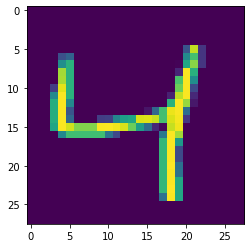

In [5]:
plt.imshow(x_train[2])
plt.show()


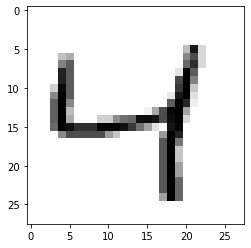

In [6]:
plt.imshow(x_train[2], cmap=plt.cm.binary)
plt.show()

# Before Normalization

In [7]:
#Before Normalization all values between 0 to 255
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

# Normalization

In [8]:
# Normalization is a pre-processing technique used to standardize data. 

# In other words, having different sources of data inside the same range. 

# Not normalizing the data before training can cause problems in our network. 

# Making it drastically harder to train and decrease its learning speed.

# Normalization can also be done by x_train/255 and x_test/255.

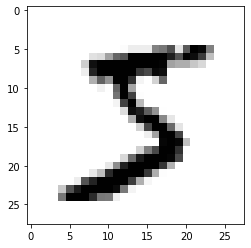

In [9]:
X_Train=tf.keras.utils.normalize(x_train)

X_Test=tf.keras.utils.normalize(x_test)

plt.imshow(x_train[0], cmap= plt.cm.binary)

# After Normalization

In [10]:
# After Normalization all values between 0 to 1 

In [11]:
print(X_Train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Resizing the image

In [12]:
#Reshaping the array to 4-dims so that it can work with the Keras API(greyscale image )

# Size of image is 28 x 28

# -1 is used to increase by 1 dimension

# Numpy is used to reshape 



X_Train=np.array(x_train).reshape(-1,28,28,1)
X_Test=np.array(x_test).reshape(-1,28,28,1)

## Create Deep Neural Networks

## Training 60,000 samples of handwritten dataset

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D


In [14]:
# Start neural network by using Sequential()

model= Sequential()

In [15]:
# First Convolutional Layear 

model.add(Conv2D(64,(3,3),input_shape=X_Train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


In [16]:
# Second Convolutional Layear
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


In [17]:

# Third Convolutional Layear
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
# Fully Connected Layear 1

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

In [19]:
# Fully Connected Layear 2
model.add(Dense(32))
model.add(Activation("relu"))

In [20]:
# Fully Connected Layear 3

model.add(Dense(16))
model.add(Activation("relu"))

In [21]:
# Last Fully Connected Layear 

# The softmax function is used as the activation function in the output layer of neural network models that predict a multinomial probability distribution.
# That is, softmax is used as the activation function for multi-class classification problems where class membership is required on more than two class labels

model.add(Dense(10))
model.add(Activation("softmax"))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [23]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics="accuracy")

# Training Model

In [24]:

model.fit(X_Train,y_train,epochs=10,validation_split=0.3)


Epoch 1/10
1313/1313 [==============================] - 32s 24ms/step - loss: 0.5993 - accuracy: 0.8171 - val_loss: 0.1592 - val_accuracy: 0.9576
Epoch 2/10
1313/1313 [==============================] - 34s 26ms/step - loss: 0.1369 - accuracy: 0.9614 - val_loss: 0.1082 - val_accuracy: 0.9702
Epoch 3/10
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0927 - accuracy: 0.9740 - val_loss: 0.1067 - val_accuracy: 0.9694
Epoch 4/10
1313/1313 [==============================] - 35s 26ms/step - loss: 0.0755 - accuracy: 0.9785 - val_loss: 0.0983 - val_accuracy: 0.9728
Epoch 5/10
1313/1313 [==============================] - 36s 28ms/step - loss: 0.0611 - accuracy: 0.9828 - val_loss: 0.0801 - val_accuracy: 0.9793
Epoch 6/10
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0496 - accuracy: 0.9851 - val_loss: 0.1055 - val_accuracy: 0.9748
Epoch 7/10
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0484 - accuracy: 0.9856 - val_loss: 0.0748 -

In [25]:
# Evaluating on testing data set MNIT
test_loss,test_accuarcy=model.evaluate(X_Test,y_test)
print("Test loss on 10,000 test samples",test_loss)

print("Validation accuracy on 10,000 test samples",test_accuarcy)

313/313 [==============================] - 2s 8ms/step - loss: 0.0751 - accuracy: 0.9815
Test loss on 10,000 test samples 0.07512281835079193
Validation accuracy on 10,000 test samples 0.9815000295639038


In [26]:
prediction=model.predict(X_Test)

In [27]:
print(prediction)

[[4.2913801e-13 9.3200230e-09 8.1251283e-06 ... 9.9999189e-01
  2.3413513e-08 2.1857410e-08]
 [5.0873826e-11 1.0185290e-07 9.9989414e-01 ... 8.4514875e-05
  1.2566670e-06 2.5037794e-16]
 [1.9400438e-12 9.9999702e-01 2.0900698e-10 ... 1.1003044e-09
  1.8166629e-07 3.2849112e-11]
 ...
 [3.5160285e-22 8.9691912e-35 7.6634379e-23 ... 0.0000000e+00
  1.5196358e-18 2.5844592e-30]
 [5.1401481e-25 2.5663874e-15 9.0965473e-16 ... 1.0140422e-23
  1.3378981e-11 1.6683961e-06]
 [1.4972705e-09 3.6003169e-21 7.1032251e-14 ... 3.5213394e-32
  9.5809680e-12 2.8880821e-15]]


In [28]:
print(np.argmax(prediction[0]))

7


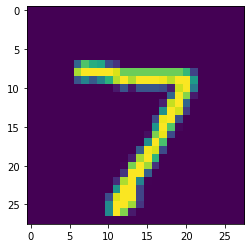

In [29]:
# Check value is true or not 
plt.imshow(X_Test[0])

# Now try to check on our image

In [43]:
# Try to check wheather it will able to predict on our image or not
import cv2


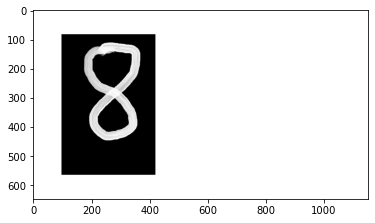

In [45]:
# read image

img=cv2.imread("C:/Users/yD/Desktop/Eight.jpg")

plt.imshow(img)

plt.show()


In [46]:
# check shape of your image
img.shape

(648, 1152, 3)

(648, 1152)

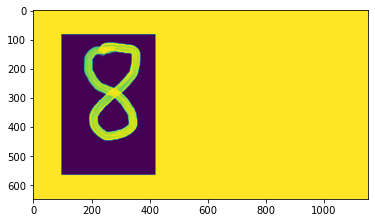

In [55]:
# image have 3 channel 
# First convert into grey image then resize in 28x28

grey=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(grey) 

grey.shape 

In [57]:
# Resize the image

resizedImg=cv2.resize(grey,(28,28),interpolation=cv2.INTER_AREA)

resizedImg.shape


(28, 28)

In [58]:
# Now normalize the image

img1=tf.keras.utils.normalize(resizedImg)

In [64]:
# Change dimension of an image
img1=np.array(img1).reshape(-1,28,28,1)
img1.shape

(1, 28, 28, 1)

In [65]:
# Select the Model
prediction=model.predict(img1)

In [67]:
# Final prediction
print(np.argmax(prediction))

8
